<a href="https://colab.research.google.com/github/unique-subedi/stats604-project1/blob/main/604_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a href="https://colab.research.google.com/github.com/unique-subedi/stats604-project1/blob/main/604_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open notebook on Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import urllib.request
import collections
import statsmodels 
import math


## Make a dictionary of dataframes for each plate

In [ ]:
plates = {}
j = 1
for i in range(510, 536):
  if(i != 518 and i != 527):
    url = "https://raw.githubusercontent.com/unique-subedi/stats604-project1/main/Data/LI8X00"+ str(i) +"_Level2.tsv"
    urllib.request.urlretrieve(url, "LI8X00"+ str(i) +"_Level2.tsv")
    plates["plate"+str(j)] = pd.read_csv("LI8X00"+ str(i) +"_Level2.tsv", sep = '\t')
    j += 1


In [ ]:
print(plates.keys())


dict_keys(['plate1', 'plate2', 'plate3', 'plate4', 'plate5', 'plate6', 'plate7', 'plate8', 'plate9', 'plate10', 'plate11', 'plate12', 'plate13', 'plate14', 'plate15', 'plate16', 'plate17', 'plate18', 'plate19', 'plate20', 'plate21', 'plate22', 'plate23', 'plate24'])


In [ ]:
plates["plate1"].head()

,WellIndex,ArrayRow,ArrayColumn,Barcode,Well,Spot,PinDiameter,CellLineSet,CellLine,CellLineLx,CellLineAn,CellLineConc,CellLineConcUnit,CellLineTimeReact,CellLineTimeUnit,ECMSet,ECM1,ECM1Lx,ECM1An,ECM1Conc,ECM1ConcUnit,ECM2,ECM2Lx,ECM2An,ECM2Conc,ECM2ConcUnit,ECMTimeReact,ECMUnit,LigandSet,Ligand1,Ligand1Lx,Ligand1An,Ligand1Conc,Ligand1ConcUnit,Ligand1TimeReact,Ligand1TimeUnit,DrugSet,Drug1,Drug1Lx,Drug1An,Drug1Conc,Drug1ConcUnit,Drug1TimeReact,Drug1TimeUnit,StainingSet,395nm,395nmLx,488nm,488nmLx,555nm,555nmLx,640nm,640nmLx,750nm,750nmLx,EndpointDAPI,Endpoint488,Endpoint555,Endpoint647,Endpoint750,ECM3,ECMp,Ligand,MEP,Drug,MEP_Drug,PrintSpot,Spot_PA_Perimeter,Cells_CP_AreaShape_Area,Cells_CP_AreaShape_Compactness,Cells_CP_AreaShape_Eccentricity,Cells_CP_AreaShape_Extent,Cells_CP_AreaShape_FormFactor,Cells_CP_AreaShape_MajorAxisLength,Cells_CP_AreaShape_MaxFeretDiameter,Cells_CP_AreaShape_MaximumRadius,Cells_CP_AreaShape_MeanRadius,Cells_CP_AreaShape_MedianRadius,Cells_CP_AreaShape_MinFeretDiameter,Cells_CP_AreaShape_MinorAxisLength,Cells_CP_AreaShape_Orientation,Cells_CP_AreaShape_Perimeter,Cells_CP_AreaShape_Solidity,Cytoplasm_CP_AreaShape_Area,Cytoplasm_CP_AreaShape_Compactness,Cytoplasm_CP_AreaShape_Eccentricity,Cytoplasm_CP_AreaShape_Extent,Cytoplasm_CP_AreaShape_FormFactor,Cytoplasm_CP_AreaShape_MajorAxisLength,Cytoplasm_CP_AreaShape_MaxFeretDiameter,Cytoplasm_CP_AreaShape_MaximumRadius,Cytoplasm_CP_AreaShape_MeanRadius,Cytoplasm_CP_AreaShape_MedianRadius,Cytoplasm_CP_AreaShape_MinFeretDiameter,Cytoplasm_CP_AreaShape_MinorAxisLength,Cytoplasm_CP_AreaShape_Orientation,Cytoplasm_CP_AreaShape_Perimeter,Cytoplasm_CP_AreaShape_Solidity,Nuclei_CP_AreaShape_Area,Nuclei_CP_AreaShape_Compactness,Nuclei_CP_AreaShape_Eccentricity,Nuclei_CP_AreaShape_Extent,Nuclei_CP_AreaShape_FormFactor,Nuclei_CP_AreaShape_MajorAxisLength,Nuclei_CP_AreaShape_MaxFeretDiameter,Nuclei_CP_AreaShape_MaximumRadius,Nuclei_CP_AreaShape_MeanRadius,Nuclei_CP_AreaShape_MedianRadius,Nuclei_CP_AreaShape_MinFeretDiameter,Nuclei_CP_AreaShape_MinorAxisLength,Nuclei_CP_AreaShape_Orientation,Nuclei_CP_AreaShape_Perimeter,Nuclei_CP_AreaShape_Solidity,Cells_CP_Intensity_IntegratedIntensity_CellMask,Cells_CP_Intensity_IntegratedIntensity_KRT19,Cells_CP_Intensity_IntegratedIntensity_KRT5,Cells_CP_Intensity_MedianIntensity_CellMask,Cells_CP_Intensity_MedianIntensity_KRT19,Cells_CP_Intensity_MedianIntensity_KRT5,Cytoplasm_CP_Intensity_IntegratedIntensity_CellMask,Cytoplasm_CP_Intensity_IntegratedIntensity_Dapi,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT19,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT5,Cytoplasm_CP_Intensity_MedianIntensity_CellMask,Cytoplasm_CP_Intensity_MedianIntensity_Dapi,Cytoplasm_CP_Intensity_MedianIntensity_KRT19,Cytoplasm_CP_Intensity_MedianIntensity_KRT5,Nuclei_CP_Intensity_IntegratedIntensity_Dapi,Nuclei_CP_Intensity_IntegratedIntensity_KRT19,Nuclei_CP_Intensity_IntegratedIntensity_KRT5,Nuclei_CP_Intensity_MedianIntensity_Dapi,Nuclei_CP_Intensity_MedianIntensity_KRT19,Nuclei_CP_Intensity_MedianIntensity_KRT5,Nuclei_PA_AreaShape_Neighbors,Nuclei_PA_Cycle_State,Cytoplasm_PA_Gated_KRT5Positive,Cytoplasm_PA_Gated_KRT19Positive,Cytoplasm_PA_Intensity_LineageRatio,Cytoplasm_PA_Gated_KRTClass,Spot_PA_SpotCellCount,Nuclei_PA_Cycle_DNA2NProportion,Nuclei_PA_Cycle_DNA4NProportion,Cytoplasm_PA_Gated_BasalLuminalNegativeProportion,Cytoplasm_PA_Gated_BasalNegativeLuminalPositiveProportion,Cytoplasm_PA_Gated_BasalPositiveLuminalNegativeProportion,Cytoplasm_PA_Gated_BasalPositivedLuminalPositiveProportion,Cells_CP_Intensity_IntegratedIntensity_KRT19_SE,Cells_CP_Intensity_IntegratedIntensity_KRT5_SE,Cells_CP_Intensity_MedianIntensity_KRT19_SE,Cells_CP_Intensity_MedianIntensity_KRT5_SE,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT19_SE,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT5_SE,Cytoplasm_CP_Intensity_MedianIntensity_KRT19_SE,Cytoplasm_CP_Intensity_MedianIntensity_KRT5_SE,Nuclei_CP_Intensity_IntegratedIntensity_KRT19_SE,Nuclei_CP_Intensity_IntegratedIn

## About the data
The column Ligand1 and the column ECMp represents the ligand and ECMPs used. For ligand, the value "FBS_pubchemsid56314508" is the control ligand because it appears in multiple plate within the staining set. We know from the lecture that "COL1" is the control ECMp.

In [ ]:
unique_ligands = np.array([])
for i in range(1,9):
  p = plates["plate"+str(i)]
  unique_ligands = np.concatenate((unique_ligands,p["Ligand1"].unique()), axis = None)
print([item for item, count in collections.Counter(unique_ligands).items() if count > 1])



['FBS_pubchemsid56314508']


## Concatenate all the plates for a particular stain. 

In [ ]:
stain1 = pd.concat([plates["plate1"],plates["plate2"], plates["plate3"],plates["plate4"],plates["plate5"],plates["plate6"],plates["plate7"],plates["plate8"]])
stain2 = pd.concat([plates["plate9"],plates["plate10"], plates["plate11"],plates["plate12"],plates["plate13"],plates["plate14"],plates["plate15"],plates["plate16"]])
stain3 = pd.concat([plates["plate17"],plates["plate18"], plates["plate19"],plates["plate20"],plates["plate21"],plates["plate22"],plates["plate23"],plates["plate24"]])

## Summary statistic of the cell count for the first plate

In [ ]:
df = plates["plate1"].loc[:, "PrintSpot":]
cell_count = df["Spot_PA_SpotCellCount"]
print(cell_count.describe())

count    5570.000000
mean       64.814901
std        25.831999
min         1.000000
25%        49.000000
50%        67.000000
75%        83.000000
max       149.000000
Name: Spot_PA_SpotCellCount, dtype: float64


## Density plot of the cell count for the first plate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


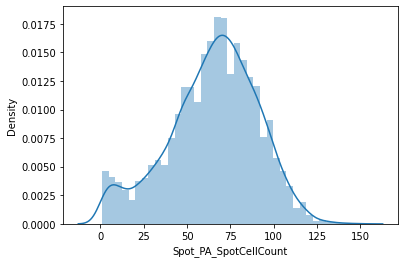

In [ ]:
sns.distplot(cell_count)

## Mean of cell count for every combination of ECMP and Ligand for stain set 1

In [ ]:
ecmp_ligand_1 = stain1.groupby(['ECMp', 'Ligand1'])
mu = ecmp_ligand_1.mean()["Spot_PA_SpotCellCount"]
median = ecmp_ligand_1.median()["Spot_PA_SpotCellCount"]
print("mean: \n ", mu)
print("Median: \n", median)

mean: 
  ECMp     Ligand1               
ALCAM|1  ANGPT1|1_Q15389|1         60.466667
         ANGPT2|1_O15123|1         47.600000
         AREG_P15514               70.533333
         BMP2_P12643               54.600000
         BMP3_P12645               78.800000
                                     ...    
gelatin  TNF_P01375                13.000000
         VEGFA|VEGF206_P15692|1     4.000000
         WNT10A_Q9GZT5              5.000000
         WNT3A|1_P56704|1          12.000000
         Wnt5a|1_P22725|1           1.000000
Name: Spot_PA_SpotCellCount, Length: 2847, dtype: float64
Median: 
 ECMp     Ligand1               
ALCAM|1  ANGPT1|1_Q15389|1         65.0
         ANGPT2|1_O15123|1         49.0
         AREG_P15514               57.0
         BMP2_P12643               55.0
         BMP3_P12645               71.0
                                   ... 
gelatin  TNF_P01375                13.0
         VEGFA|VEGF206_P15692|1     4.0
         WNT10A_Q9GZT5              5.0
    

The maximum median cell count is for the combination ('COL4', 'FGF2|3_P09038|2'), whereas the minimum is for the combination ('air', 'BMP4_P12644').

In [ ]:
print(median.idxmax())
print(median.idxmin())

('COL4', 'FGF2|3_P09038|2')
('air', 'BMP4_P12644')


## Analysis of phenotypical properties of the combination of control ECMp and control Ligand for staining set 1.

The median cell count of the control group is 76.0 and the corresponding box plot is shown below.


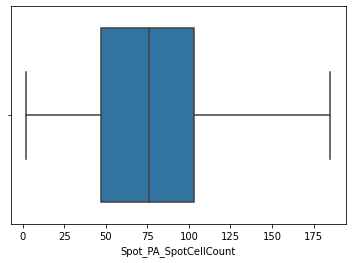

In [ ]:
control_1 = ecmp_ligand_1.get_group(('COL1', 'FBS_pubchemsid56314508'))
sns.boxplot(x=control_1["Spot_PA_SpotCellCount"])
print("The median cell count of the control group is "+ str( control_1["Spot_PA_SpotCellCount"].median()) + " and the corresponding box plot is shown below.")

Let us compare the median cell count of the control group to that of the group with the highest and the lowest median cell count. 

The median cell count of the treatment group ('COL4', 'FGF2|3_P09038|2') is 145.0 and the corresponding box plot is shown below.


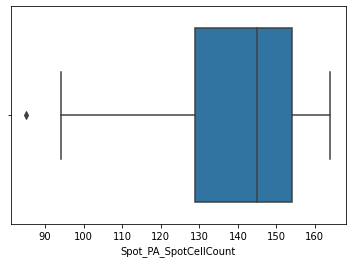

In [ ]:
treatment_max  = ecmp_ligand_1.get_group(('COL4', 'FGF2|3_P09038|2'))
print("The median cell count of the treatment group ('COL4', 'FGF2|3_P09038|2') is "+ str( treatment_max["Spot_PA_SpotCellCount"].median()) + " and the corresponding box plot is shown below.")
sns.boxplot(x=treatment_max["Spot_PA_SpotCellCount"])


In [ ]:
treatment_min  = ecmp_ligand_1.get_group(('air', 'BMP4_P12644'))
treatment_min["Spot_PA_SpotCellCount"].describe()


count    4.0
mean     1.5
std      1.0
min      1.0
25%      1.0
50%      1.0
75%      1.5
max      3.0
Name: Spot_PA_SpotCellCount, dtype: float64

We observe that the median cell count of the treatment group ('air', 'BMP4_P12644') is 1, that of the control group ('COL1', 'FBS_pubchemsid56314508') is 76, and that of the treatment group ('COL4', 'FGF2|3_P09038|2') is 145.

Interestingly, if you repeat this analysis for all three staining cells, the ECMP value 'air' always has the lowest median cell count. However, the corresponding ligand changes across the staining cells.

## Pairwise t-test for spot cell count

We used Welch's test, which does not assume equal population variance.

In [ ]:
names = list(ecmp_ligand_1.groups)
p_values = []
for name, group in ecmp_ligand_1:
  result = stats.ttest_ind(control_1["Spot_PA_SpotCellCount"], group["Spot_PA_SpotCellCount"], equal_var = False)
  p_values.append(result[1])

idx = (np.isnan(p_values)-1)*-1
names = np.delete(names, idx, axis =0).tolist()
p_values = np.delete(p_values, idx)


Since this is a multiple testing problem, we used Bonferroni-Holm adjustment to control FWER at 0.05.

In [ ]:
results = statsmodels.stats.multitest.multipletests(p_values, alpha=0.05, method='holm', is_sorted=False, returnsorted=False)
reject_indices = np.nonzero(results[0])
names_reject = np.delete(names, reject_indices, axis =0).tolist()
pvalues_reject = np.delete(p_values, reject_indices)
print(names_reject)

[['ALCAM|1', 'AREG_P15514'], ['ALCAM|1', 'BMP2_P12643'], ['ALCAM|1', 'BMP3_P12645'], ['ALCAM|1', 'BMP4_P12644'], ['ALCAM|1', 'BMP6_P22004'], ['ALCAM|1', 'BMP7_P18075'], ['ALCAM|1', 'CTGF|1_P29279|1'], ['ALCAM|1', 'CXCL12|Alpha_P48061|2'], ['ALCAM|1', 'CXCL12|Beta_P48061|1'], ['ALCAM|1', 'CXCL1_P09341'], ['ALCAM|1', 'CXCL8|1_P10145|1'], ['ALCAM|1', 'DLL1|1_O00548|1'], ['ALCAM|1', 'DLL4_Q9NR61'], ['ALCAM|1', 'EGF|1_P01133|1'], ['ALCAM|1', 'FASLG|1_P48023|1'], ['ALCAM|1', 'FBS_pubchemsid56314508'], ['ALCAM|1', 'FGF2|3_P09038|2'], ['ALCAM|1', 'FGF6_P10767'], ['ALCAM|1', 'FLT3LG|1_P49771|1'], ['ALCAM|1', 'GPNMB|1_Q14956|1'], ['ALCAM|1', 'HGF|1_P14210|1'], ['ALCAM|1', 'IGF1|1_P05019|1'], ['ALCAM|1', 'IGFBP2_P18065'], ['ALCAM|1', 'IGFBP3|1_P17936|1'], ['ALCAM|1', 'IL13_P35225'], ['ALCAM|1', 'IL15|IL15S48AA_P40933|1'], ['ALCAM|1', 'IL1B_P01584'], ['ALCAM|1', 'IL6_P05231'], ['ALCAM|1', 'IL7|1_P13232|1'], ['ALCAM|1', 'JAG1|1_P78504|1'], ['ALCAM|1', 'JAG2|Long_Q9Y219|1'], ['ALCAM|1', 'KITLG|1_P21